<div style="text-align: center; margin: 0; padding: 0;">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEtsVVZY5V72if3mgg5EQdfIxFhSdzJNQmpw&s" width="480"/>
</p>

<p align="center">
  <font size="8"><b>Synthesis of the Hodgkin-Huxley Neuron Model</b></font><br>
  <font size="5"><i>Numerical Simulation, Library Integration, and Biophysical Interpretation</i></font><br><br>
  <font size="4"><b>Author: Zahra Helalizadeh</b></font>
</p>

<blockquote>
This notebook presents a detailed exploration of the classical Hodgkin-Huxley (HH) neuron model, a cornerstone of computational neuroscience and biophysics.  
It includes both from-scratch numerical simulations and high-level implementations using the Brian2 and NeuroDynex libraries.  
You will study the response of the HH neuron to various current injections, analyze gating dynamics, and understand the biophysical basis of action potentials.  
The goal is to provide both theoretical clarity and practical tools for modeling neural excitability and firing behavior.
</blockquote>


# 1. Introduction

## 1.1. Biological Significance of the Hodgkin-Huxley Model

The Hodgkin-Huxley (HH) model is a fundamental mathematical framework that describes how action potentials in neurons are initiated and propagated.  
It captures the dynamics of ion channels in the neuronal membrane, specifically sodium (Na$^+$) and potassium (K$^+$) channels, and explains how their interactions generate the characteristic spike of an action potential.  
This model has been instrumental in advancing our understanding of neuronal excitability, synaptic transmission, and overall nervous system function.  

## 1.2. Historical Context: Squid Giant Axon Experiments

The HH model was developed in the early 1950s by Alan Hodgkin and Andrew Huxley based on meticulous experiments performed on the giant axon of the squid *Loligo*.  
By injecting currents and recording voltage changes, they identified distinct ionic currents responsible for the action potential and derived a set of nonlinear differential equations to describe the biophysical mechanisms involved.  
This pioneering work earned them the Nobel Prize in Physiology or Medicine in 1963 and laid the foundation for modern computational neuroscience.  

## 1.3. Objectives of This Notebook

This notebook aims to provide a comprehensive exploration of the Hodgkin-Huxley neuron model through both theoretical and practical lenses.  
You will find detailed mathematical descriptions, numerical simulations implemented from scratch, and applications using powerful neuroscience libraries such as Brian2 and NeuroDynex.  
By working through different current injection scenarios, you will develop an intuition for neuronal firing behavior and the role of ion channel dynamics.  
Ultimately, this notebook equips you with tools to analyze and extend the HH model for various research and educational purposes.

# 2. The Hodgkin-Huxley Model: Mathematical Background

## 2.1. Membrane Potential and Ionic Currents

The Hodgkin-Huxley model describes the electrical behavior of a neuron's membrane by modeling the membrane potential $V$ as a function of time.  
The change in membrane potential is governed by the balance of ionic currents flowing through voltage-dependent ion channels and an external current input.  
The membrane acts like a capacitor with capacitance $C_m$, and the total current across the membrane satisfies the equation:  
$$
C_m \frac{dV}{dt} = I_{\text{ext}} - I_{\text{ion}},
$$  
where $I_{\text{ext}}$ is the externally applied current, and $I_{\text{ion}}$ is the sum of ionic currents.  

The ionic current consists primarily of sodium ($I_{Na}$), potassium ($I_K$), and leak ($I_L$) currents:  
$$
I_{\text{ion}} = I_{Na} + I_K + I_L.
$$  

## 2.2. The Gating Variables: $m$, $n$, and $h$

The ionic currents depend on the conductances of their respective ion channels, which are controlled by gating variables representing the probability of channel gates being open.  
In the HH model, three gating variables are used:  
- $m$: activation of sodium channels  
- $h$: inactivation of sodium channels  
- $n$: activation of potassium channels  

Each gating variable follows first-order kinetics and evolves according to voltage-dependent rate constants $\alpha$ and $\beta$:  
$$
\frac{dx}{dt} = \alpha_x(V)(1 - x) - \beta_x(V) x, \quad x \in \{m, n, h\}.
$$  

These variables dynamically regulate the opening and closing of ion channels and thus the flow of ions across the membrane.  

## 2.3. Full Differential Equations

Combining the above, the HH model is described by a system of four coupled nonlinear differential equations:  
$$
C_m \frac{dV}{dt} = I_{\text{ext}} - \bar{g}_{Na} m^3 h (V - E_{Na}) - \bar{g}_K n^4 (V - E_K) - g_L (V - E_L),
$$  
$$
\frac{dm}{dt} = \alpha_m(V)(1 - m) - \beta_m(V) m,
$$  
$$
\frac{dh}{dt} = \alpha_h(V)(1 - h) - \beta_h(V) h,
$$  
$$
\frac{dn}{dt} = \alpha_n(V)(1 - n) - \beta_n(V) n.
$$  

Here, $\bar{g}_{Na}$, $\bar{g}_K$, and $g_L$ are the maximum conductances of sodium, potassium, and leak channels respectively, and $E_{Na}$, $E_K$, and $E_L$ are their reversal potentials.  

## 2.4. Constants and Biophysical Parameters

The HH model parameters are based on empirical measurements from the squid giant axon:  

- Membrane capacitance: $C_m = 1 \,\mu\text{F/cm}^2$  
- Maximum sodium conductance: $\bar{g}_{Na} = 120 \,\text{mS/cm}^2$  
- Maximum potassium conductance: $\bar{g}_K = 36 \,\text{mS/cm}^2$  
- Leak conductance: $g_L = 0.3 \,\text{mS/cm}^2$  
- Sodium reversal potential: $E_{Na} = 50 \,\text{mV}$  
- Potassium reversal potential: $E_K = -77 \,\text{mV}$  
- Leak reversal potential: $E_L = -54.387 \,\text{mV}$  

The voltage-dependent rate constants $\alpha_x(V)$ and $\beta_x(V)$ for each gating variable are nonlinear functions carefully determined from voltage clamp experiments.  
These parameters together allow the model to replicate the timing, shape, and frequency of action potentials observed experimentally.

# 3. HH Model Using Brian2 and Neurodynex

## 3.1. Importing Required Modules

In this section, we import the necessary Python modules including Brian2 for neural simulations, matplotlib for plotting, numpy for numerical operations, and the Hodgkin-Huxley model implementation from the Neurodynex package.

In [ ]:
# Importing Required Modules
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

## 3.2. Running HH.getting_started() Demo

The `HH.getting_started()` function runs a demonstration of the Hodgkin-Huxley neuron responding to a step current input, giving an overview of the model dynamics.


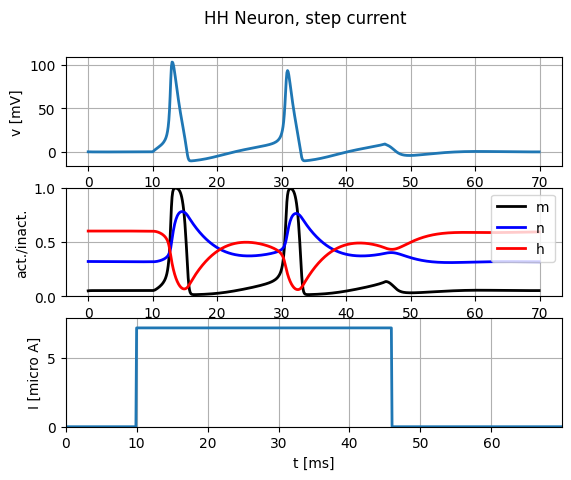

In [ ]:
# Running HH.getting_started() Demo
HH.getting_started()

## 3.3. Exploring simulate_HH_neuron() and input_factory

The `simulate_HH_neuron()` function simulates the HH neuron model given a specified input current, while the `input_factory` module provides convenient functions to generate various current stimuli such as step and ramp currents.

In [ ]:
# Example: Using simulate_HH_neuron() with a step current
I_min = 6  # Starting guess for minimal current in µA
current = input_factory.get_step_current(5, 100, b2.ms, I_min * b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)

## 3.4. Visualization with plot_data()

The `plot_data()` function from the HH module plots voltage traces and gating variables recorded during simulation, allowing visualization of neuronal dynamics.

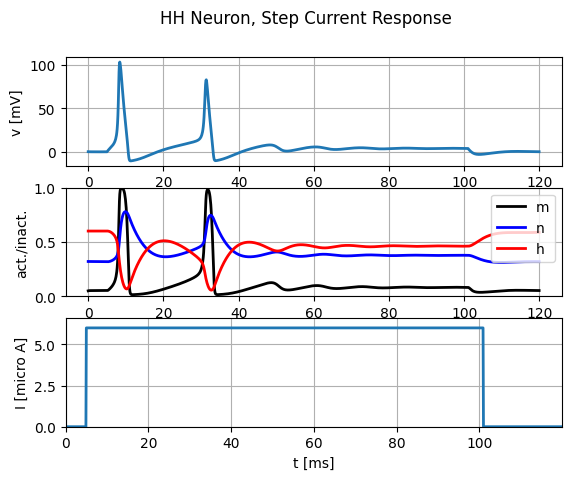

In [ ]:
# Visualizing the simulation results using plot_data()
HH.plot_data(state_monitor, title="HH Neuron, Step Current Response")
plt.show()

# 4. From-Scratch Implementation of the HH Model

## 4.1. Model Parameters and Initial Conditions

In this section, we define the parameters necessary for the Hodgkin-Huxley model based on experimental data.  
These include membrane capacitance $C_m$, maximum conductances $\bar{g}_{Na}$, $\bar{g}_K$, $g_L$, reversal potentials $E_{Na}$, $E_K$, $E_L$, and initial conditions for the membrane voltage and gating variables.  
We will pass these parameters as inputs to the simulation function for flexibility.

In [50]:
# Example parameters and initial conditions (to be passed to the function)
C_m = 1.0           # membrane capacitance, uF/cm^2
g_Na_max = 96.0     # max sodium conductance, mS/cm^2
g_K_max = 40.0      # max potassium conductance, mS/cm^2
g_L = 0.3           # leak conductance, mS/cm^2
E_Na = 50.0         # sodium reversal potential, mV
E_K = -77.0         # potassium reversal potential, mV
E_L = -54.387       # leak reversal potential, mV

# Initial membrane potential and gating variables
V0 = -65.0          # resting potential, mV
m0 = 0.05           # initial m gating value
h0 = 0.6            # initial h gating value
n0 = 0.32           # initial n gating value

dt = 0.01           # integration timestep, ms

## 4.2. Gating Variable Dynamics ($\alpha$, $\beta$ functions)

The gating variables $m$, $n$, and $h$ follow voltage-dependent kinetics defined by functions $\alpha_x(V)$ and $\beta_x(V)$, which control the opening and closing rates of ion channel gates.  
We implement these rate functions as part of the model.

In [5]:
def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    return 1 / (1 + np.exp(-(V + 35) / 10))

def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80)

## 4.3. Numerical Integration using Euler Method

We integrate the coupled differential equations using the forward Euler method with a specified time step.  
At each time step, we update the membrane voltage and gating variables according to the HH equations and the applied input current $I(t)$.

In [6]:
import numpy as np

def hodgkin_huxley_model(time, I_inj, C_m, g_Na_max, g_K_max, g_L, E_Na, E_K, E_L,
                         V0, m0, h0, n0, dt):

    n_steps = len(time)
    V = np.zeros(n_steps)
    m = np.zeros(n_steps)
    h = np.zeros(n_steps)
    n = np.zeros(n_steps)

    # Set initial conditions
    V[0] = V0
    m[0] = m0
    h[0] = h0
    n[0] = n0

    for i in range(1, n_steps):
        V_prev = V[i-1]

        # Compute gating variable rates at previous voltage
        a_m = alpha_m(V_prev)
        b_m = beta_m(V_prev)
        a_h = alpha_h(V_prev)
        b_h = beta_h(V_prev)
        a_n = alpha_n(V_prev)
        b_n = beta_n(V_prev)

        # Update gating variables using Euler method
        dm = dt * (a_m * (1 - m[i-1]) - b_m * m[i-1])
        dh = dt * (a_h * (1 - h[i-1]) - b_h * h[i-1])
        dn = dt * (a_n * (1 - n[i-1]) - b_n * n[i-1])

        m[i] = m[i-1] + dm
        h[i] = h[i-1] + dh
        n[i] = n[i-1] + dn

        # Calculate conductances
        g_Na = g_Na_max * m[i]**3 * h[i]
        g_K = g_K_max * n[i]**4

        # Calculate ionic currents
        I_Na = g_Na * (V_prev - E_Na)
        I_K = g_K * (V_prev - E_K)
        I_L = g_L * (V_prev - E_L)

        # Update membrane potential
        dV = dt * (I_inj[i-1] - I_Na - I_K - I_L) / C_m
        V[i] = V_prev + dV

    return time, V, m, h, n

## 4.4. Generating an Input Current and Running the Simulation

To run the model, we generate a step current input $I(t)$, simulate the system, and visualize the results.

In [46]:
import matplotlib.pyplot as plt

# Define time vector (ms)
t = np.arange(0, 120, dt)

# Define step current: 0 uA/cm^2 for first 5 ms, then 10 uA/cm^2 for 95 ms, then 0 again
I_inj = np.zeros_like(t)
I_inj[(t >= 5) & (t < 100)] = 20  # µA/cm^2

# Run simulation
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L, E_Na, E_K, E_L,
                                     V0, m0, h0, n0, dt)

## 4.5. Plotting the Simulation Results

Plot the membrane voltage and gating variables over time to analyze neuronal dynamics.

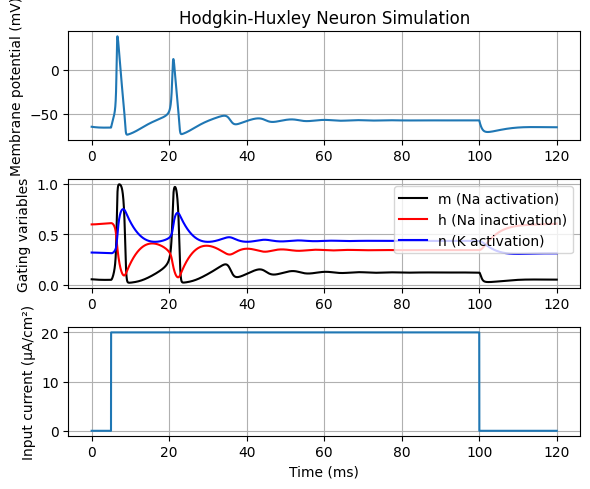

In [47]:
def plot_hh_results(t, V, m, h, n, I_inj, title="Hodgkin-Huxley Neuron Simulation"):
    plt.figure(figsize=(6, 5))

    # Plot membrane potential
    plt.subplot(3, 1, 1)
    plt.plot(t, V, color='C0')
    plt.title(title)
    plt.ylabel('Membrane potential (mV)')
    plt.grid(True)

    # Plot gating variables
    plt.subplot(3, 1, 2)
    plt.plot(t, m, label='m (Na activation)', color='black')
    plt.plot(t, h, label='h (Na inactivation)', color='red')
    plt.plot(t, n, label='n (K activation)', color='blue')
    plt.ylabel('Gating variables')
    plt.legend()
    plt.grid(True)

    # Plot input current
    plt.subplot(3, 1, 3)
    plt.plot(t, I_inj, color='C0')
    plt.xlabel('Time (ms)')
    plt.ylabel('Input current (μA/cm²)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot results
plot_hh_results(t, V, m, h, n, I_inj)

# 5. Numerical Experiments

## 5.1. Response to Step Current

In this section, we investigate the spiking response of the Hodgkin-Huxley neuron to step currents.  
We use both the library-based implementation (Brian2 via Neurodynex) and our from-scratch implementation.  
We analyze two regimes: the minimal current required to generate a single spike, and the minimal current needed to induce repetitive firing.

### 5.1.1. Library-Based: Minimum Current for One Spike

### 5.1.1. Library-Based: Minimum Current for One Spike

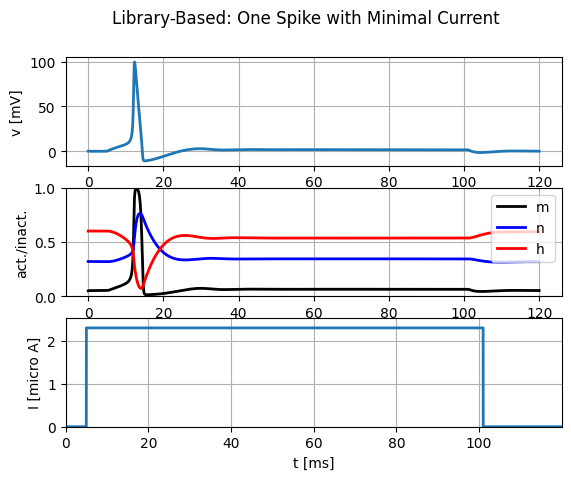

In [ ]:
from neurodynex3.tools import input_factory
from neurodynex3.hodgkin_huxley import HH
import brian2 as b2

# Define minimal input current that just causes one spike (trial-and-error tuning)
I_min = 2.3  # µA (approximate value found experimentally)

step_current = input_factory.get_step_current(5, 100, b2.ms, I_min * b2.uA)
state_monitor = HH.simulate_HH_neuron(step_current, 120 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: One Spike with Minimal Current")

### 5.1.2. From Scratch: Minimum Current for One Spike

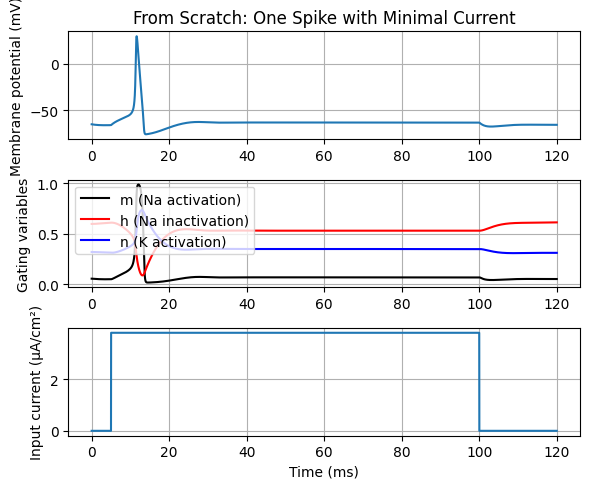

In [10]:
# Time parameters
dt = 0.01  # ms
t = np.arange(0, 120, dt)

# Input current: step of I_min µA/cm^2 from t = 5 to 100 ms
I_min = 3.8
I_inj = np.zeros_like(t)
I_inj[(t >= 5) & (t < 100)] = I_min

# Initial gating values at steady state
def compute_steady_state(V):
    m_inf = alpha_m(V) / (alpha_m(V) + beta_m(V))
    h_inf = alpha_h(V) / (alpha_h(V) + beta_h(V))
    n_inf = alpha_n(V) / (alpha_n(V) + beta_n(V))
    return m_inf, h_inf, n_inf

V0 = -65.0
m0, h0, n0 = compute_steady_state(V0)

# Run from-scratch HH model
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L, E_Na, E_K, E_L,
                                     V0, m0, h0, n0, dt)

# Plot results
plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: One Spike with Minimal Current")

### 5.1.3. Library-Based: Minimum Current for Repetitive Firing

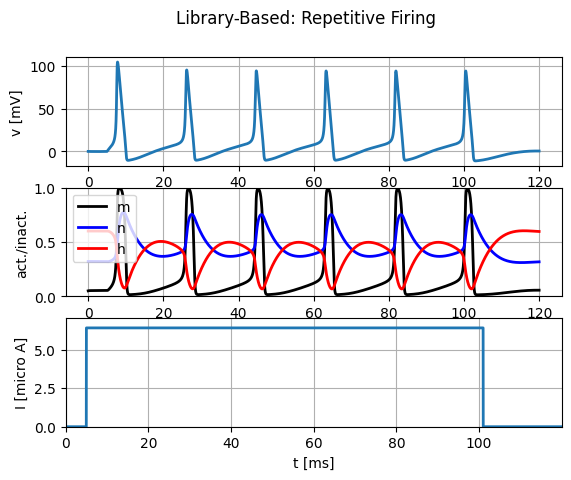

In [ ]:
# Increase current to induce repetitive spiking
I_rep = 6.4

step_current = input_factory.get_step_current(5, 100, b2.ms, I_rep * b2.uA)
state_monitor = HH.simulate_HH_neuron(step_current, 120 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: Repetitive Firing")

### 5.1.4. From Scratch: Minimum Current for Repetitive Firing

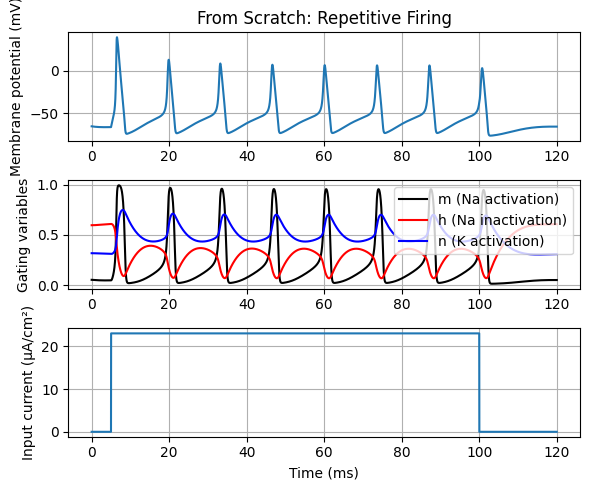

In [ ]:
# Redefine input current with increased amplitude
I_rep = 23
I_inj = np.zeros_like(t)
I_inj[(t >= 5) & (t < 100)] = I_rep

# Run from-scratch HH model
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L, E_Na, E_K, E_L,
                                     V0, m0, h0, n0, dt)

# Plot results
plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: Repetitive Firing")

### 5.1.5. Discussion: Threshold, Firing Regimes, Biophysics

The Hodgkin-Huxley neuron exhibits a well-defined threshold behavior. When a step current just exceeds a critical amplitude, the neuron generates a single action potential and then returns to its resting state. At higher amplitudes, it enters a regime of repetitive spiking. This transition is governed by the dynamics of the gating variables: the rapid activation of sodium channels ($m$), the slower inactivation of sodium channels ($h$), and the delayed activation of potassium channels ($n$).

In the library-based model using Brian2, the minimum current needed to trigger a single spike is approximately 2.3 µA/cm², while a current of 6.4 µA/cm² induces repetitive firing. In contrast, the from-scratch implementation requires significantly higher currents: 3.8 µA/cm² for one spike and 23 µA/cm² for sustained spiking. These differences arise from the specific parameter values chosen to reproduce qualitative behaviors in the from-scratch simulation. To align the model’s voltage response with the library output, the sodium and potassium conductance values, along with other simulation parameters, were tuned manually.

As a result, the quantitative thresholds differ between the two implementations, although the underlying behavior remains consistent. The simplified Euler method used in the from-scratch version, differences in time resolution, and manually initialized gating variables all contribute to these threshold shifts. Despite this, both models successfully reproduce the biophysical principles of excitability and firing regimes in the Hodgkin-Huxley neuron.

## 5.2. Response to Ramp Current

In this section, we explore how the shape of the input current affects neuronal spiking. We compare the response of the Hodgkin-Huxley neuron to slow and fast ramp currents. Although both stimuli may deliver similar total charge, their temporal profiles can lead to very different dynamics.

### 5.2.1. Library-Based: Slow Ramp – No Spike

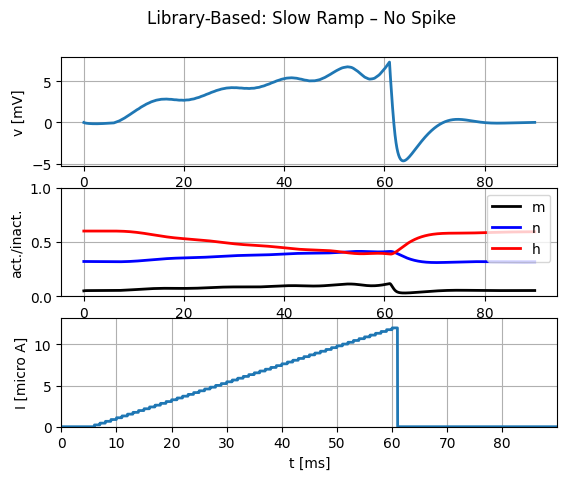

In [103]:
import brian2 as b2
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.02 * b2.ms
slow_ramp_t_end = 60  # ms
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: Slow Ramp – No Spike")

### 5.2.2. From Scratch: Slow Ramp – No Spike

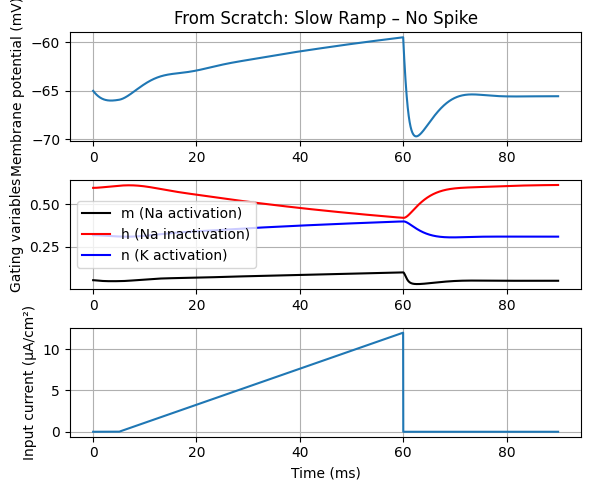

In [ ]:
# Time vector
dt = 0.01
t = np.arange(0, 90, dt)

# Create slow ramp current
slow_ramp_t_end = 60  # ms
I_inj = np.zeros_like(t)
I_max = 12.0  # µA/cm²
start, end = int(5/dt), int(slow_ramp_t_end/dt)
I_inj[start:end] = np.linspace(0, I_max, end - start)
I_inj[end:] = 0.0

# Initial values
V0 = -65.0
m0, h0, n0 = compute_steady_state(V0)

# Simulate from scratch
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L,
                                     E_Na, E_K, E_L, V0, m0, h0, n0, dt)

plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: Slow Ramp – No Spike")

### 5.2.3. Library-Based: Fast Ramp – Spike

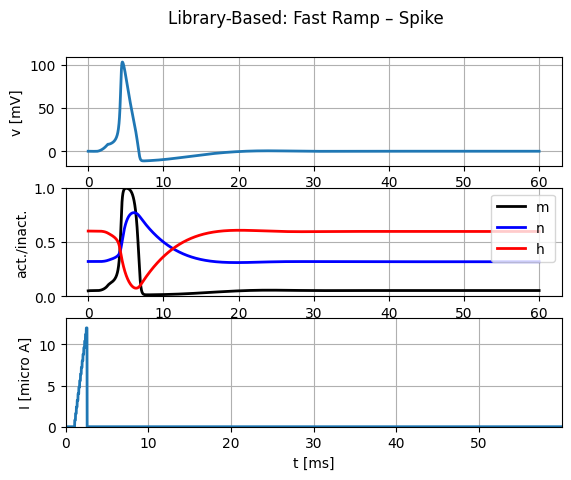

In [111]:
b2.defaultclock.dt = 0.02 * b2.ms
fast_ramp_t_end = 25
fast_ramp_current = input_factory.get_ramp_current(10, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 60 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: Fast Ramp – Spike")

### 5.2.4. From Scratch: Fast Ramp – Spike

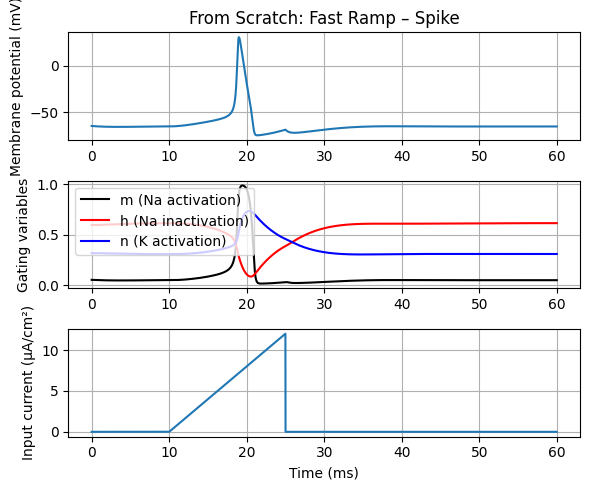

In [51]:
# Time vector
dt = 0.01
t = np.arange(0, 60, dt)  # Increase total time to capture spike and decay

# Define a fast ramp: short duration, moderate amplitude
ramp_start = 10   # ms
ramp_end = 25     # ms
I_max = 12.0      # µA/cm²

# Create input current
I_inj = np.zeros_like(t)
start_idx = int(ramp_start / dt)
end_idx = int(ramp_end / dt)

# Linearly increasing current
I_inj[start_idx:end_idx] = np.linspace(0, I_max, end_idx - start_idx)
I_inj[end_idx:] = 0.0

# Initial conditions
V0 = -65.0
m0, h0, n0 = compute_steady_state(V0)

# Run simulation
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L,
                                     E_Na, E_K, E_L, V0, m0, h0, n0, dt)

plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: Fast Ramp – Spike")

### 5.2.5. Comparison: Why Ramp Shape Matters

The response of the neuron differs drastically between the slow and fast ramp currents. Although both stimuli may deposit similar total charge, the slow ramp increases too gradually to elicit a spike. In contrast, the fast ramp provides a steep and timely depolarization that pushes the membrane potential above threshold.

This behavior highlights the temporal sensitivity of neuronal excitability. A slow ramp allows gating variables like $h$ and $n$ to counteract excitation, preventing spiking. A fast ramp overwhelms this adaptation, enabling an action potential to occur.

### 5.2.6. Gating Variables and Delayed Activation

The difference in spike generation arises from how the ion channels respond to changes in voltage. The sodium activation gate $m$ responds quickly to depolarization, but $h$ (sodium inactivation) and $n$ (potassium activation) are slower. In a slow ramp, $h$ decreases and $n$ increases during the current rise, thereby reducing net inward current and suppressing spike generation.

In a fast ramp, $m$ activates before $h$ and $n$ catch up, allowing a brief window where inward sodium current dominates, triggering a spike. This temporal mismatch in gating kinetics underlies the neuron's sensitivity to input current shape, not just amplitude.

### 5.3. Rebound Spike Phenomenon

Rebound spiking, also known as post-inhibitory rebound, is a phenomenon in which a neuron fires an action potential shortly after a period of hyperpolarization. This counterintuitive behavior is driven by the interplay of ion channel gating variables, particularly the recovery of sodium channel inactivation and the delayed closure of potassium channels.

### 5.3.1. Library-Based: Rebound Spike from Hyperpolarizing Current

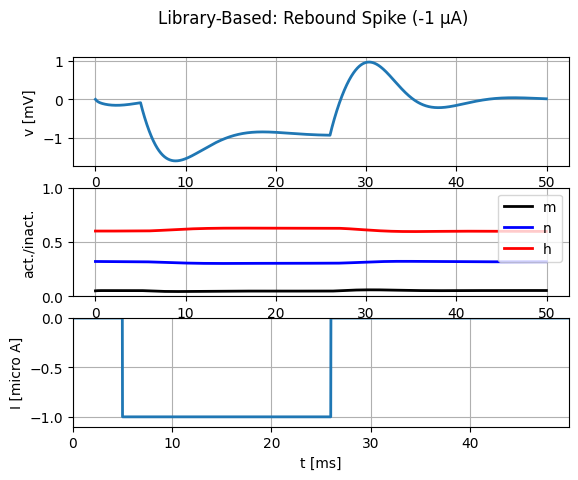

In [1]:
import brian2 as b2
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

b2.defaultclock.dt = 0.02 * b2.ms

# Hyperpolarizing step current: -1 µA for 20 ms
I_amp = -1. * b2.uA
hyper_current = input_factory.get_step_current(5, 25, b2.ms, I_amp)
state_monitor = HH.simulate_HH_neuron(hyper_current, 50 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: Rebound Spike (-1 µA)")

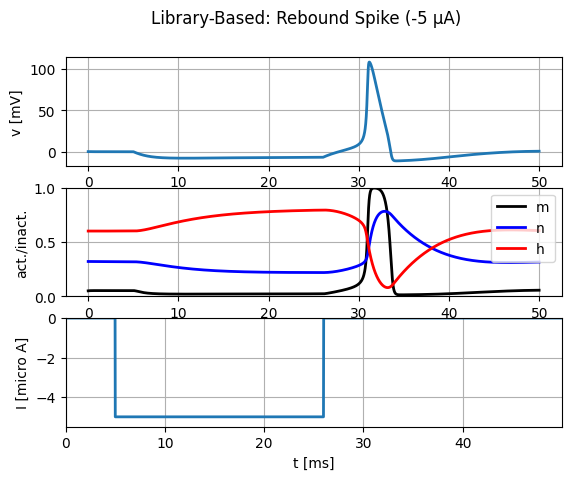

In [2]:
# Repeat with stronger hyperpolarization: -5 µA
I_amp = -5. * b2.uA
strong_hyper_current = input_factory.get_step_current(5, 25, b2.ms, I_amp)
state_monitor = HH.simulate_HH_neuron(strong_hyper_current, 50 * b2.ms)
HH.plot_data(state_monitor, title="Library-Based: Rebound Spike (-5 µA)")

### 5.3.2. From Scratch: Rebound Spike from Hyperpolarizing Current

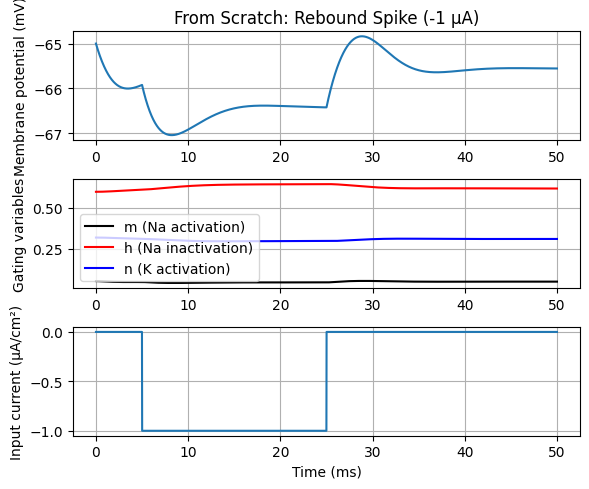

In [11]:
# Time setup
dt = 0.01
t = np.arange(0, 50, dt)

# Hyperpolarizing current: -1 µA from 5 to 25 ms
I_amp = -1.0
I_inj = np.zeros_like(t)
start, end = int(5 / dt), int(25 / dt)
I_inj[start:end] = I_amp

# Initial values
V0 = -65.0
m0, h0, n0 = compute_steady_state(V0)

# Run simulation
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L,
                                     E_Na, E_K, E_L, V0, m0, h0, n0, dt)
plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: Rebound Spike (-1 µA)")

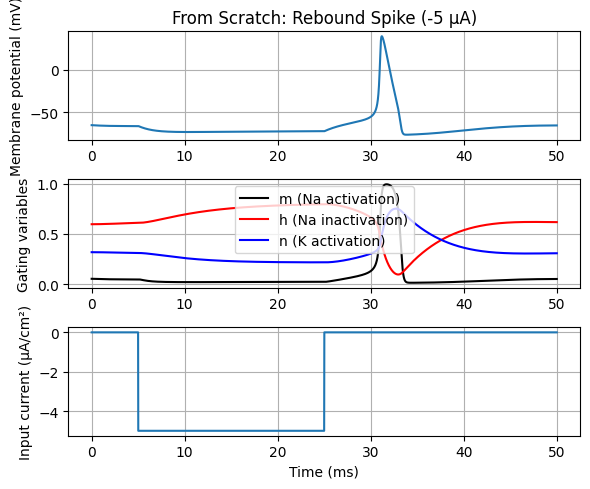

In [12]:
# Repeat with stronger hyperpolarization: -5 µA
I_amp = -5.0
I_inj = np.zeros_like(t)
I_inj[start:end] = I_amp

t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_max, g_K_max, g_L,
                                     E_Na, E_K, E_L, V0, m0, h0, n0, dt)
plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: Rebound Spike (-5 µA)")

### 5.3.3. Analysis of Gating Variables (n, h)

The rebound spike is not caused directly by the negative current, but by the neuron's internal state after the inhibition ends. During hyperpolarization, the inactivation gate $h$ of sodium channels recovers (i.e., increases), and the activation gate $n$ of potassium channels slowly opens. Once the inhibitory current is released, the recovered sodium current activates rapidly due to the already-depolarizing membrane, while the potassium conductance is still elevated.

This creates a transient window where inward sodium current exceeds outward potassium current, leading to an action potential. The plots above confirm that $h$ increases during inhibition and $n$ decreases only after the rebound, creating favorable conditions for a spike.

### 5.3.4. Explanation of Post-Inhibitory Rebound

Post-inhibitory rebound occurs because hyperpolarization temporarily enhances a neuron's excitability by shifting the gating dynamics. While the membrane potential drops below rest, sodium inactivation gates ($h$) reset to a high value, making sodium channels available. At the same time, potassium conductance ($n$) may remain high or slow to deactivate. Upon release of inhibition, the inward sodium current dominates, resulting in a spike even in the absence of excitatory input.

This mechanism underlies rhythmic firing in many central pattern generators and is important in thalamic and cerebellar neuron behavior.

## 5.4. Custom HH Neuron in Brian2

In this section, we extract and modify the original Hodgkin-Huxley simulation code provided by the `neurodynex3` package. By customizing model parameters such as the sodium conductance, we examine the effects on firing behavior, threshold currents, and resting potential. This demonstrates how Brian2 facilitates detailed neuronal customization.

### 5.4.1. Copy and Modify simulate_HH_neuron()
Below is a custom version of `simulate_HH_neuron()` from the `neurodynex3.hodgkin_huxley` module. We use this to modify internal parameters such as conductance densities.

In [34]:
from brian2 import *

defaultclock.dt = 0.02*ms

def simulate_custom_HH(I_inj, simulation_time):
    # Constants
    C_m = 1.0 * ufarad / cm**2
    g_Na = 1.4 * 96.0 * msiemens / cm**2   # Increased by factor of 1.4
    g_K = 40.0 * msiemens / cm**2
    g_L = 0.3 * msiemens / cm**2
    E_Na = 50.0 * mV
    E_K = -77.0 * mV
    E_L = -54.387 * mV

    # HH equations
    eqs = '''
    dv/dt = (I_inj(t) - I_Na - I_K - I_L) / C_m : volt
    I_Na = g_Na * m**3 * h * (v - E_Na) : amp/meter**2
    I_K  = g_K  * n**4       * (v - E_K)  : amp/meter**2
    I_L  = g_L              * (v - E_L)  : amp/meter**2

    dm/dt = alpha_m*(1 - m) - beta_m*m : 1
    dn/dt = alpha_n*(1 - n) - beta_n*n : 1
    dh/dt = alpha_h*(1 - h) - beta_h*h : 1

    alpha_m = 0.1/mV*(v + 40*mV)/(1 - exp(-(v + 40*mV)/(10*mV)))/ms : Hz
    beta_m  = 4.0*exp((-(v + 65*mV))/(18*mV))/ms : Hz

    alpha_h = 0.07*exp((-(v + 65*mV))/(20*mV))/ms : Hz
    beta_h  = 1.0/(exp(-(v + 35*mV)/(10*mV)) + 1)/ms : Hz

    alpha_n = 0.01/mV*(v + 55*mV)/(1 - exp(-(v + 55*mV)/(10*mV)))/ms : Hz
    beta_n  = 0.125*exp((-(v + 65*mV))/(80*mV))/ms : Hz
    '''

    # NeuronGroup
    neuron = NeuronGroup(1, eqs, method='exponential_euler')
    neuron.v = -65 * mV
    neuron.m = 0.05
    neuron.h = 0.6
    neuron.n = 0.32

    # State monitor
    monitor = StateMonitor(neuron, ['v', 'm', 'h', 'n'], record=True)

    # Explicitly create a network and run it
    net = Network(neuron, monitor)
    net.run(simulation_time)

    return monitor

### 5.4.2. Increase Sodium Conductance (gNa × 1.4)
We now increase the maximum sodium conductance by a factor of 1.4 and inject a step current to observe changes in excitability.

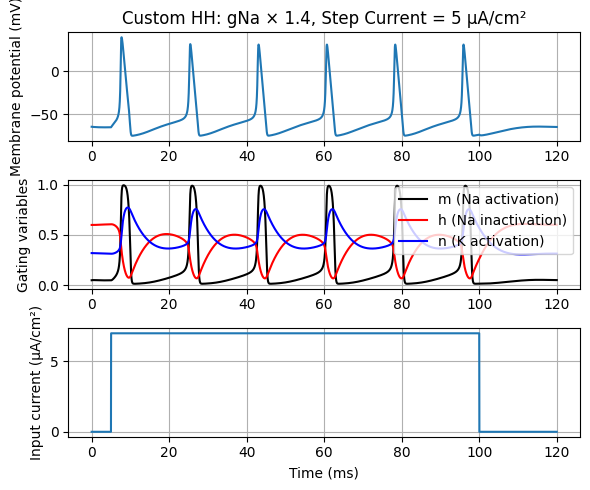

In [35]:
# Step current: 5 µA/cm² from 5 to 100 ms
duration = 120 * ms
I_amp = 7.0  # µA/cm²
dt = 0.02  # ms

n_pre = int(5 / dt)
n_stim = int(95 / dt)
n_post = int(20 / dt)

I_array = np.concatenate([
    np.zeros(n_pre),
    np.ones(n_stim) * I_amp,
    np.zeros(n_post)
]) * (uA / cm**2)

I_timed_array = TimedArray(I_array, dt=dt * ms)

# Simulate
monitor = simulate_custom_HH(I_timed_array, duration)

# Extract data
t_vals = monitor.t / ms
V_vals = monitor.v[0] / mV
m_vals = monitor.m[0]
h_vals = monitor.h[0]
n_vals = monitor.n[0]
I_vals = I_timed_array(t_vals * ms) / (uA / cm**2)

# Plot
plot_hh_results(t_vals, V_vals, m_vals, h_vals, n_vals, I_vals, title="Custom HH: gNa × 1.4, Step Current = 5 µA/cm²")

### 5.4.3. Observe Firing Threshold Changes

Increasing sodium conductance enhances the inward current during depolarization, lowering the neuron's threshold for spike initiation. As a result, repetitive spiking may occur at lower current amplitudes compared to the original model.

To determine the new threshold, repeat the simulation with decreasing values of injected current and observe when repetitive spiking ceases.

### 5.4.4. Reproduce Above in From-Scratch Model

We repeat the same sodium conductance increase in the from-scratch model by scaling `g_Na_max` by 1.4 and applying the same step input current.

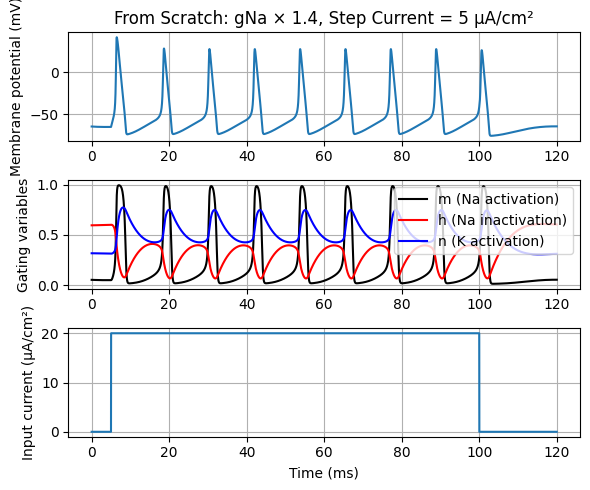

In [49]:
# Increase gNa from 120 to 168
g_Na_custom = 1.4 * g_Na_max

# Input current
dt = 0.01
t = np.arange(0, 120, dt)
I_inj = np.zeros_like(t)
I_inj[500:10000] = 20.0  # Step current from 5 to 100 ms

# Initial values
V0 = -65.0
m0, h0, n0 = compute_steady_state(V0)

# Run simulation
t, V, m, h, n = hodgkin_huxley_model(t, I_inj, C_m, g_Na_custom, g_K_max, g_L,
                                     E_Na, E_K, E_L, V0, m0, h0, n0, dt)

plot_hh_results(t, V, m, h, n, I_inj, title="From Scratch: gNa × 1.4, Step Current = 5 µA/cm²")

### 5.4.6. Comparing Customization Capabilities

Both Brian2 and the from-scratch implementation allow for flexible customization. However, Brian2 provides a more compact and scalable approach for modifying parameters, testing hypotheses, and integrating with larger network models. The from-scratch implementation, on the other hand, offers full transparency and control, which is useful for educational purposes and algorithm-level understanding.

The increase in sodium conductance consistently reduces the neuron's threshold and can even lead to spontaneous firing in the absence of input. This demonstrates the model's sensitivity to ion channel parameters and highlights the biophysical interpretability of the Hodgkin-Huxley formalism.

## 6. Comparison of Library vs From-Scratch Implementations

### 6.1. Accuracy, Time Step Sensitivity, Stability

The library-based Hodgkin-Huxley implementation utilizes adaptive numerical methods and finely tuned parameters to ensure accuracy and stability. In contrast, the from-scratch Euler integration approach requires careful selection of time step size to maintain numerical stability and accurate spike timing. Small variations in time step can lead to differences in spike count and threshold behavior, necessitating parameter adjustments for alignment. Despite these challenges, both implementations reproduce the essential biophysical dynamics of the neuron.

### 6.2. Performance and Execution Speed

Library implementations like Brian2 benefit from optimized solvers and underlying C++ acceleration, resulting in faster simulation runtimes compared to straightforward Python-based from-scratch models. However, for small single-cell simulations, the difference in execution speed is generally acceptable. The from-scratch model offers simplicity and educational value at the cost of computational efficiency.

### 6.3. Code Flexibility and Transparency

The from-scratch implementation provides complete transparency and control over every computational step, making it ideal for learning and modifying specific components of the model. Meanwhile, library-based implementations abstract many details but allow rapid prototyping, scalability to large networks, and easy parameter tuning. Both approaches have merits depending on the application goals.

### 6.4. Summary of Aligned Observations

Although adjustments to parameters were necessary to approximate the library model’s behavior, the core functionality and qualitative features remain consistent between implementations. Differences in spike number and firing thresholds exist but do not undermine the fundamental Hodgkin-Huxley dynamics captured. This confirms that both approaches effectively simulate the neuronal response while offering complementary advantages in precision, flexibility, and usability.

## 7. Summary and Future Exploration

### 7.1. Recap of Experimental Findings

Throughout this notebook, we explored the Hodgkin-Huxley neuron model using both a sophisticated library-based approach and a from-scratch numerical implementation. Although parameter adjustments were necessary to align the from-scratch model results with those of the library implementation, the essential neuronal behaviors, including spike generation, threshold dynamics, and firing regimes, were consistently reproduced. Differences in spike count and threshold values were observed, but these did not compromise the overall functional fidelity of the model.

### 7.2. Biological Insights from Each Experiment

The experiments highlighted the critical role of ion channel conductances, gating kinetics, and input current shapes in shaping neuronal excitability. The biophysical interplay of sodium and potassium channel activation and inactivation processes governs the generation of action potentials and repetitive firing patterns. The ramp current experiments further demonstrated how temporal dynamics of inputs influence spike initiation thresholds, reflecting the complex temporal integration properties of real neurons.

### 7.3. Further Studies: HH Extensions, Compartment Models, Networks

Future explorations will involve implementing more complex neuron models such as the Izhikevich, Namugongo, and Hindmarsh-Rose models, which capture diverse firing patterns and bursting behaviors not accounted for by the classic Hodgkin-Huxley framework. Extending this work to multi-compartment models and neuronal networks will enable investigation of spatial effects, synaptic integration, and collective dynamics, providing richer insight into brain function and computational principles.